In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder



# **Step 1: Exploratory Data Analysis (EDA) and Data Understanding **

*  Select a dataset related to one of the United Nations Sustainable Development Goals (UNSDG).


* Load the dataset using pandas and perform an initial analysis.

link of dataset:
https://www.kaggle.com/datasets/sujithmandala/simple-loan-classification-dataset








In [ ]:
# dataset for classification
loan= pd.read_csv('/content/drive/MyDrive/dataset/testing dataset/loan.csv')
# displaying top 5 rows
loan.head()


,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved


In [ ]:
# displaying tha last 5 rows
loan.tail()

,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved
60,38,Male,Chef,Associate's,Married,65000,700,Approved


In [ ]:
# checking row and column of dataset
loan.shape

(61, 8)

In [ ]:
# shows dtypes and columns with not-null count
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [ ]:
# describing data as count,mean,std, min and max value of each column
# OR statistics description of overall data
loan.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [ ]:
loan.dtypes
#seeing datatypes with column name and their input datatype
# when columns dataypes is different is known as object

,0
age,int64
gender,object
occupation,object
education_level,object
marital_status,object
income,int64
credit_score,int64
loan_status,object


In [ ]:
loan.columns
# shows columns name

Index(['age', 'gender', 'occupation', 'education_level', 'marital_status',
       'income', 'credit_score', 'loan_status'],
      dtype='object')

# **Exploratory Data Analysis (EDA)bold text**

In [ ]:
loan.isnull().sum()
# checking for null value

,0
age,0
gender,0
occupation,0
education_level,0
marital_status,0
income,0
credit_score,0
loan_status,0


In above dataset there are zero null value

In [ ]:
loan.duplicated()
# checking dublicated data

,0
0,False
1,False
2,False
3,False
4,False
...,...
56,False
57,False
58,False
59,False


# **Data Visualization**

In [ ]:
select = loan.select_dtypes(include=['object']).columns#selecting the column which data type is object
for col in select:
    loan[col] = LabelEncoder().fit_transform(loan[col])#by labelEncoder new label is created and by fit_transform assiogn unique numerical value as class

Histogram plot

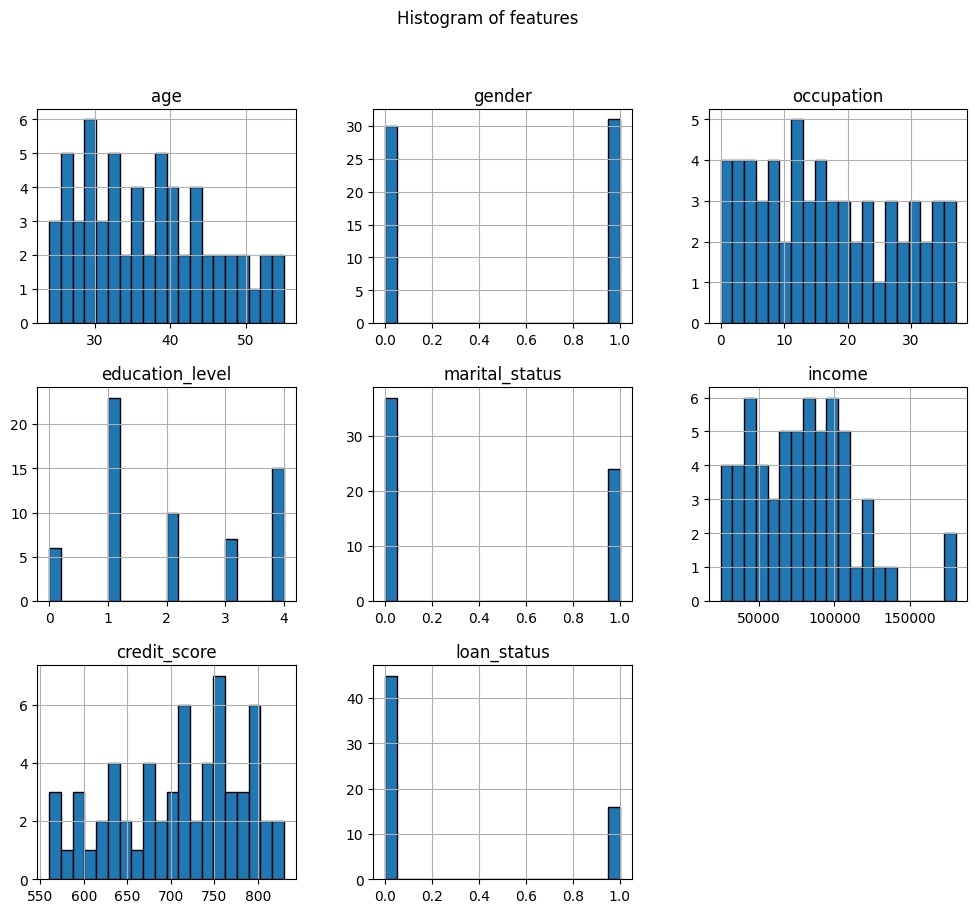

In [ ]:
loan.hist(bins=20 ,figsize = (12,10), edgecolor = 'black')
# histogram is plot
plt.suptitle('Histogram of features')
plt.show()

A histogram is a bar graph which representation of the distribution of a variable. It shows the frequency of occurrences of each value of the variable. The x-axis represents the range of values of the variable, and the y-axis represents the frequency or count of each value.

If most of the data are on the left side of the histogram but a few larger values are on the right, the data are said to be skewed to the right or vice versa.

If a value of observation falls in the tail of a histogram, the value is an outlier or outliers are extreme individual data points.

Bar plot

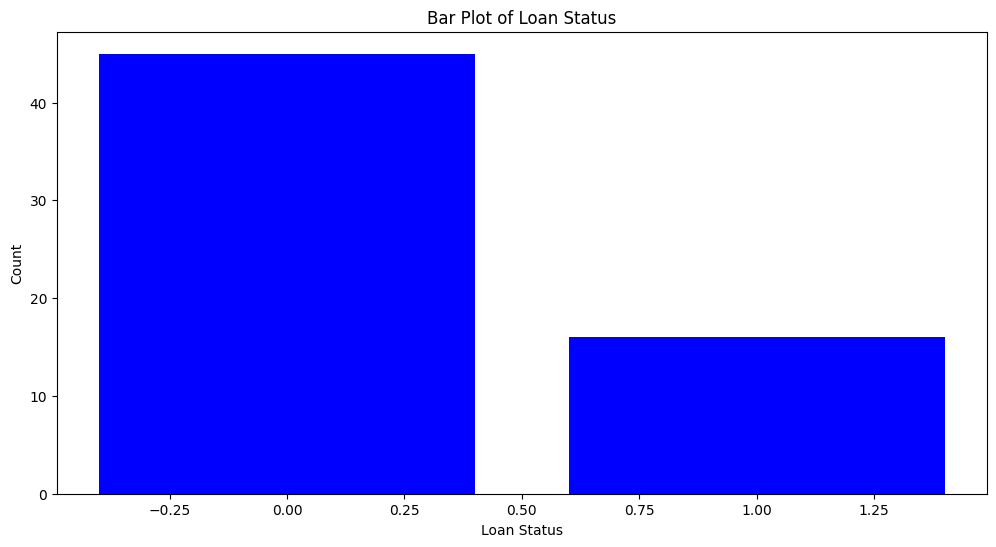

In [ ]:
plt.figure(figsize = (12,6))

plt.bar(x=loan['loan_status'].value_counts().index,
        height=loan['loan_status'].value_counts().values,
        color='blue')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.title('Bar Plot of Loan Status')
plt.show()

From this bar graph it can be analysis that there are few loan is approved.

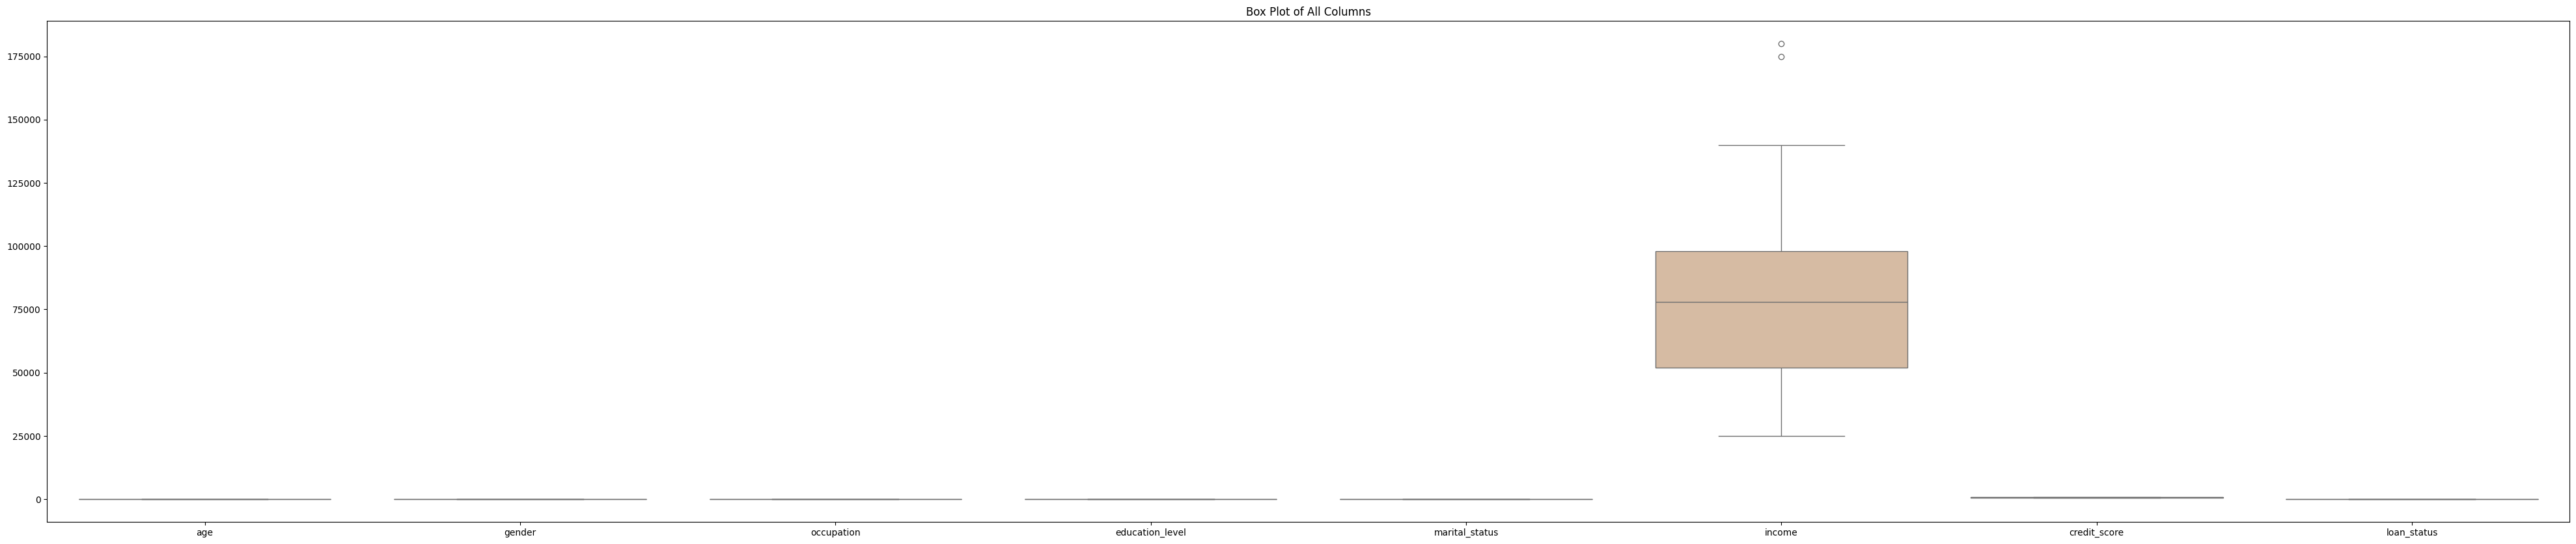

In [ ]:
plt.figure(figsize=(50, 10))
sns.boxplot(data=loan, palette='pastel')
plt.title('Box Plot of All Columns')
plt.show()

Heatmap

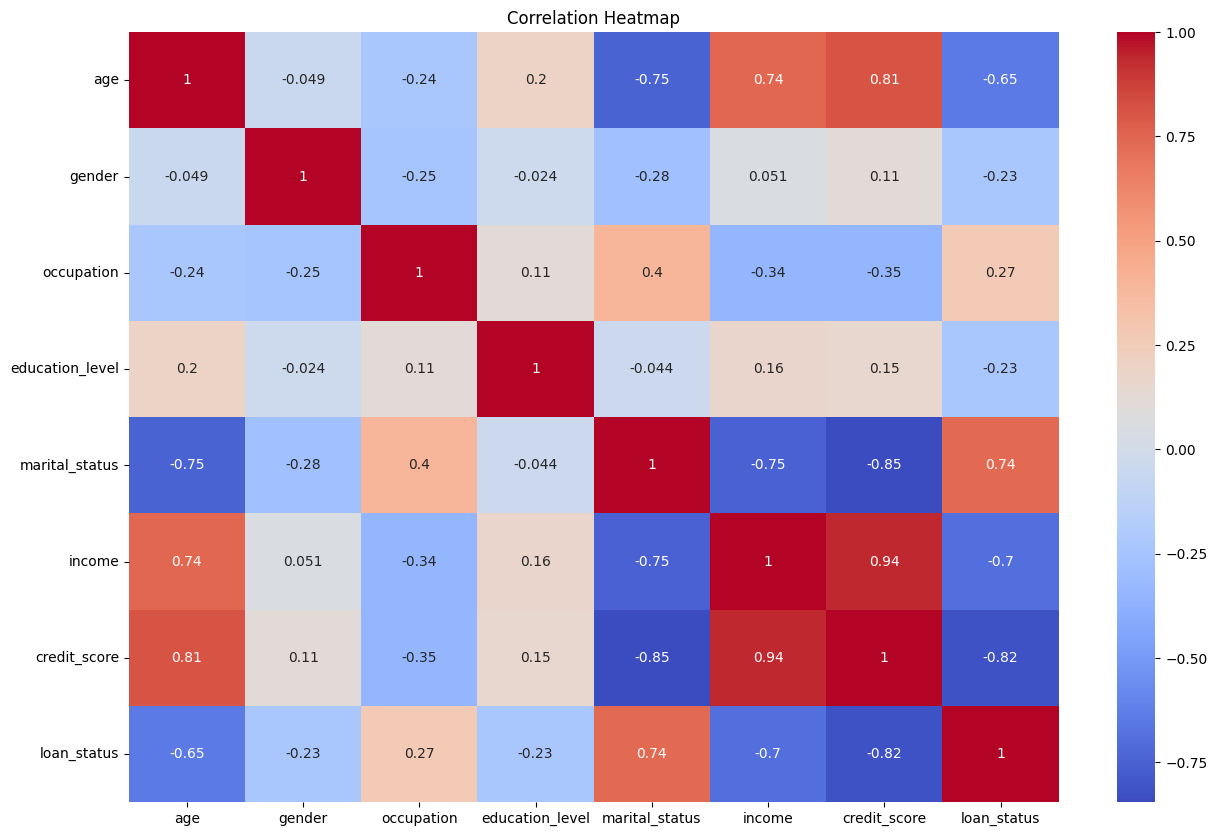

In [ ]:
plt.figure(figsize=(15, 10))  # Reduce figure size
sns.heatmap(loan.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# **Step 2: Build Logistic Regression from Scratch**

In [ ]:
class logestic_regression():
  # declesring learning rate &number of iterations(Hyperparameters)
  def __init__(self,learning_rate,no_of_iterations):#declearing parameter from learning_rate
    self.learning_rate = learning_rate#alpha
    self.no_of_iterations = no_of_iterations

  # fit function to train the model with dataset
  def fit(self,X,Y):
    #x is known as features and y is known as label
    # number of data points in the dataset(number of rows)--> m

    self.m=X.shape[0]
    # number of input features in the dataset(number of columns)--> n
    self.n=X.shape[1]

    # initialiating weight & bias value
    self.w = np.zeros(self.n)
    self.b=0
    self.X = X
    self.Y = Y

    # implementing Gradient Descent for Optimization
    for i in range(self.no_of_iterations):
      self.update_weights()

  #
  def update_weights(self):
    # Y_hat formula(Sigmoid function)
    Y_hat = 1/(1+np.exp(-(self.X.dot(self.w)+self.b)))#z = w.X+b

    # derivatives
    dw = (1/self.m)*np.dot(self.X.T,(Y_hat-self.Y))#T is transpose of X
    db = (1/self.m)*np.sum(Y_hat-self.Y)

    # updating the weights & bias using gradient descent
    self.w = self.w - self.learning_rate * dw
    self.b = self.b - self.learning_rate * db

  # Sigmoid Equation & decision Boundary
  def predict(self,X):
    Y_pred = 1/(1+np.exp(-(X.dot(self.w)+self.b)))
    Y_pred = np.where(Y_pred > 0.5, 1, 0) #  if true return 1 else 0
    return Y_pred


# **Step 3: Build a Primary Model**

In [ ]:
# seperating features amd label
# features
X = loan.drop(columns = 'loan_status',axis = 1)
# label
Y = loan['loan_status']

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data = scaler.transform(X)

In [ ]:
X =standardized_data
Y = loan['loan_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
classifier = logestic_regression(learning_rate=0.01,no_of_iterations=1000)
classifier.fit(X_train,y_train)

# **Accuracy Score**

In [ ]:
# accuracy score on the tranning data
x_train_prediction = classifier.predict(X_train)
tranning_data_accuracy = accuracy_score(y_train,x_train_prediction)
print('Accuracy_score of the tranning data: ',tranning_data_accuracy)

Accuracy_score of the tranning data:  0.9375


In [ ]:
x_test_preduction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_test,x_test_preduction)
print('Accuracy score of the data:',test_data_accuracy )

Accuracy score of the data: 0.8461538461538461


# **4. Build a Primary Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Train random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Evaluate models
lr_acc = accuracy_score(y_test, lr.predict(X_test))
rf_acc = accuracy_score(y_test, rf.predict(X_test))

# Print accuracies
print(f"Logistic Regression Accuracy: {lr_acc:.2f}")
print(f"Random Forest Accuracy: {rf_acc:.2f}")

# Compare and display the better model
if lr_acc > rf_acc:
    print("Logistic Regression is the better model.")
elif rf_acc > lr_acc:
    print("Random Forest is the better model.")
else:
    print("Both models perform equally well.")


Logistic Regression Accuracy: 1.00
Random Forest Accuracy: 1.00
Both models perform equally well.


# **Step 4: Hyperparameter Optimization**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters
param_grid = {'n_estimators': [10, 50, 100], 'max_depth': [5, 10, None]}

# GridSearchCV
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'max_depth': 5, 'n_estimators': 10}


# **Step 5: Feature Selection**

In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Assuming X_train is a numpy array, convert it to a DataFrame if necessary
if isinstance(X_train, np.ndarray):
    X_train = pd.DataFrame(X_train)

# Recursive Feature Elimination
selector = RFE(RandomForestClassifier(), n_features_to_select=5)
selector.fit(X_train, y_train)

# Selected features
selected_features = X_train.columns[selector.support_]
print(f"Selected Features: {selected_features}")


Selected Features: Index([0, 2, 4, 5, 6], dtype='int64')


# **Regression Data**

# **Step 1: Exploratory Data Analysis (EDA)**
*  Select a dataset related to one of the United Nations Sustainable Development Goals (UNSDG).


* Load the dataset using pandas and perform an initial analysis.

link of dataset:https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

In [ ]:
price = pd.read_csv('/content/drive/MyDrive/dataset/testing dataset/Clean_Dataset.csv')
price

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
# displaying tha last 5 rows
price.tail()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [ ]:
price.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
# checking row and column of dataset
price.shape

(300153, 12)

In [ ]:
# shows dtypes and columns with not-null count
price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [ ]:
# describing data as count,mean,std, min and max value of each column
# OR statistics description of overall data
price.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [ ]:
price.dtypes
#seeing datatypes with column name and their input datatype
# when columns dataypes is different is known as object

,0
Unnamed: 0,int64
airline,object
flight,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64


In [ ]:
price.columns
# shows columns name

Index(['Unnamed: 0', 'airline', 'flight', 'source_city', 'departure_time',
       'stops', 'arrival_time', 'destination_city', 'class', 'duration',
       'days_left', 'price'],
      dtype='object')

In [ ]:
price.isnull().sum()
# checking for null value

,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


In [ ]:
price.duplicated()
# checking dublicated data

,0
0,False
1,False
2,False
3,False
4,False
...,...
300148,False
300149,False
300150,False
300151,False


In [ ]:
sel = price.select_dtypes(include=['object']).columns#selecting the column which data type is object
for col in sel:
    price[col] = LabelEncoder().fit_transform(price[col])#by labelEncoder new label is created and by fit_transform assiogn unique numerical value as class

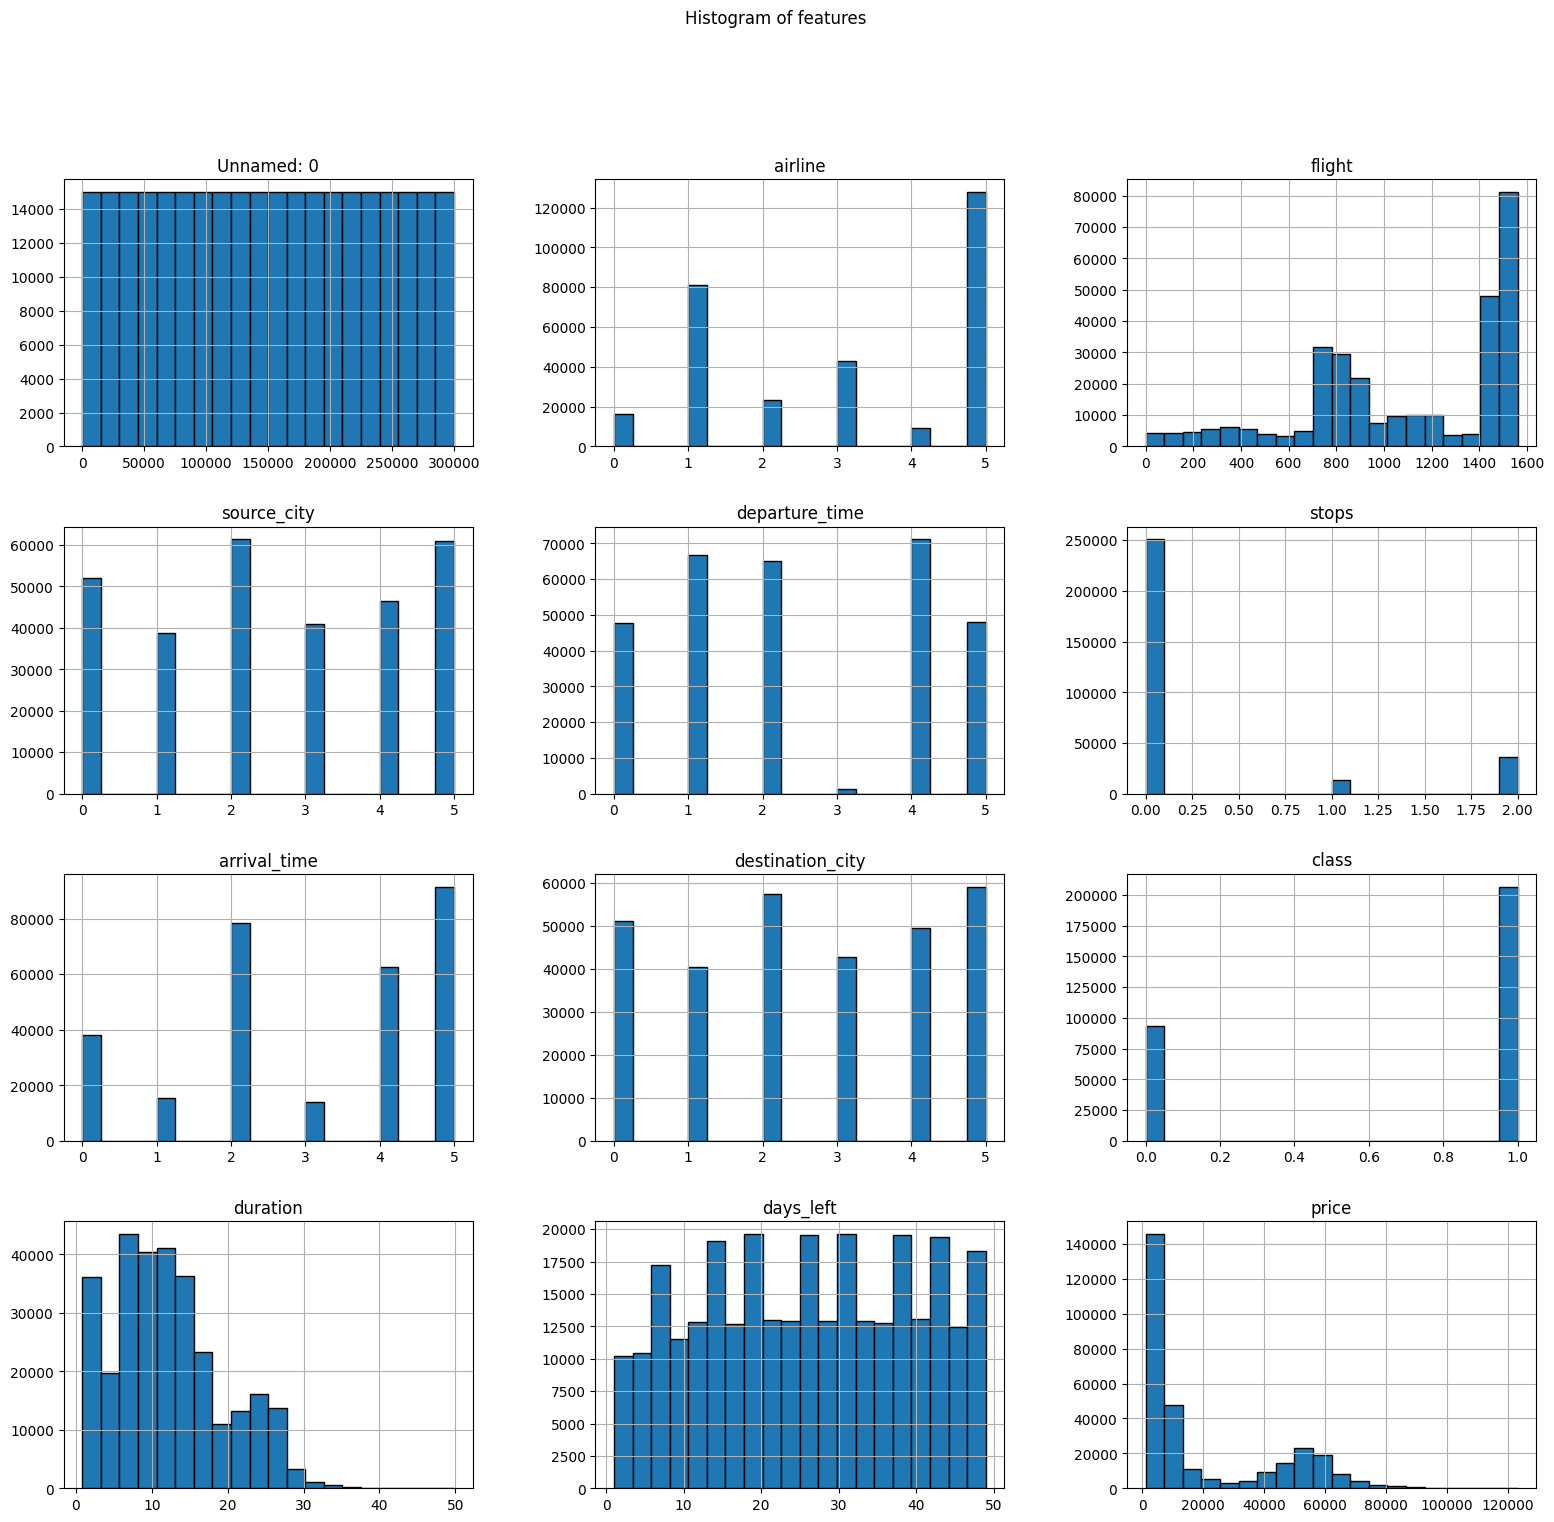

In [ ]:
price.hist(bins=20 ,figsize = (19,17), edgecolor = 'black')
# histogram is plot
plt.suptitle('Histogram of features')
plt.show()

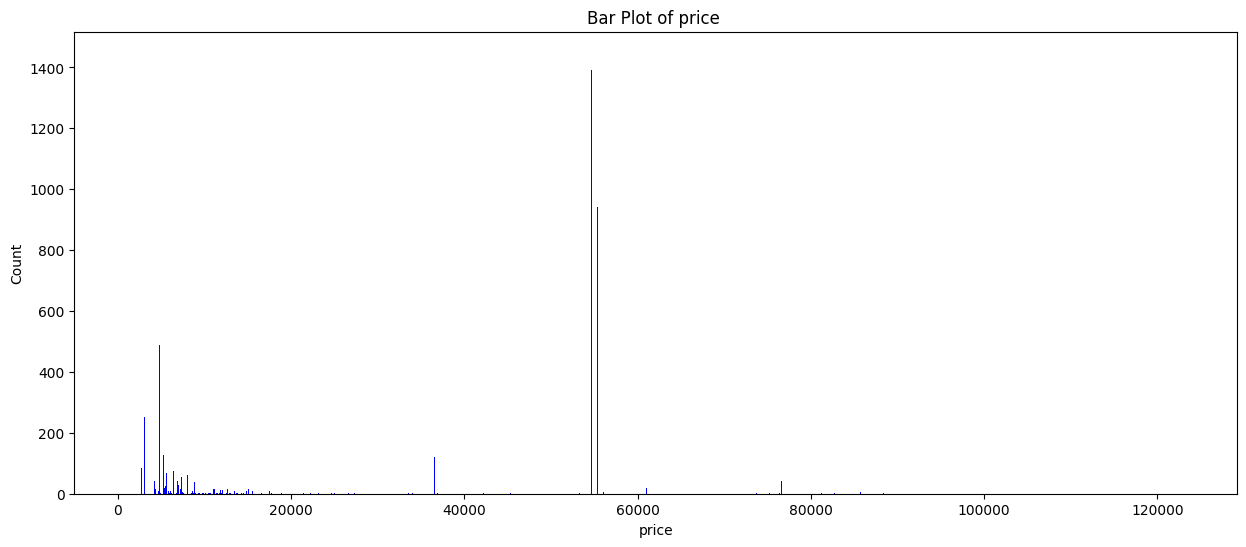

In [ ]:
plt.figure(figsize = (15,6))

plt.bar(x=price['price'].value_counts().index,height=price['price'].value_counts().values,color='blue')
plt.xlabel('price')
plt.ylabel('Count')
plt.title('Bar Plot of price ')
plt.show()

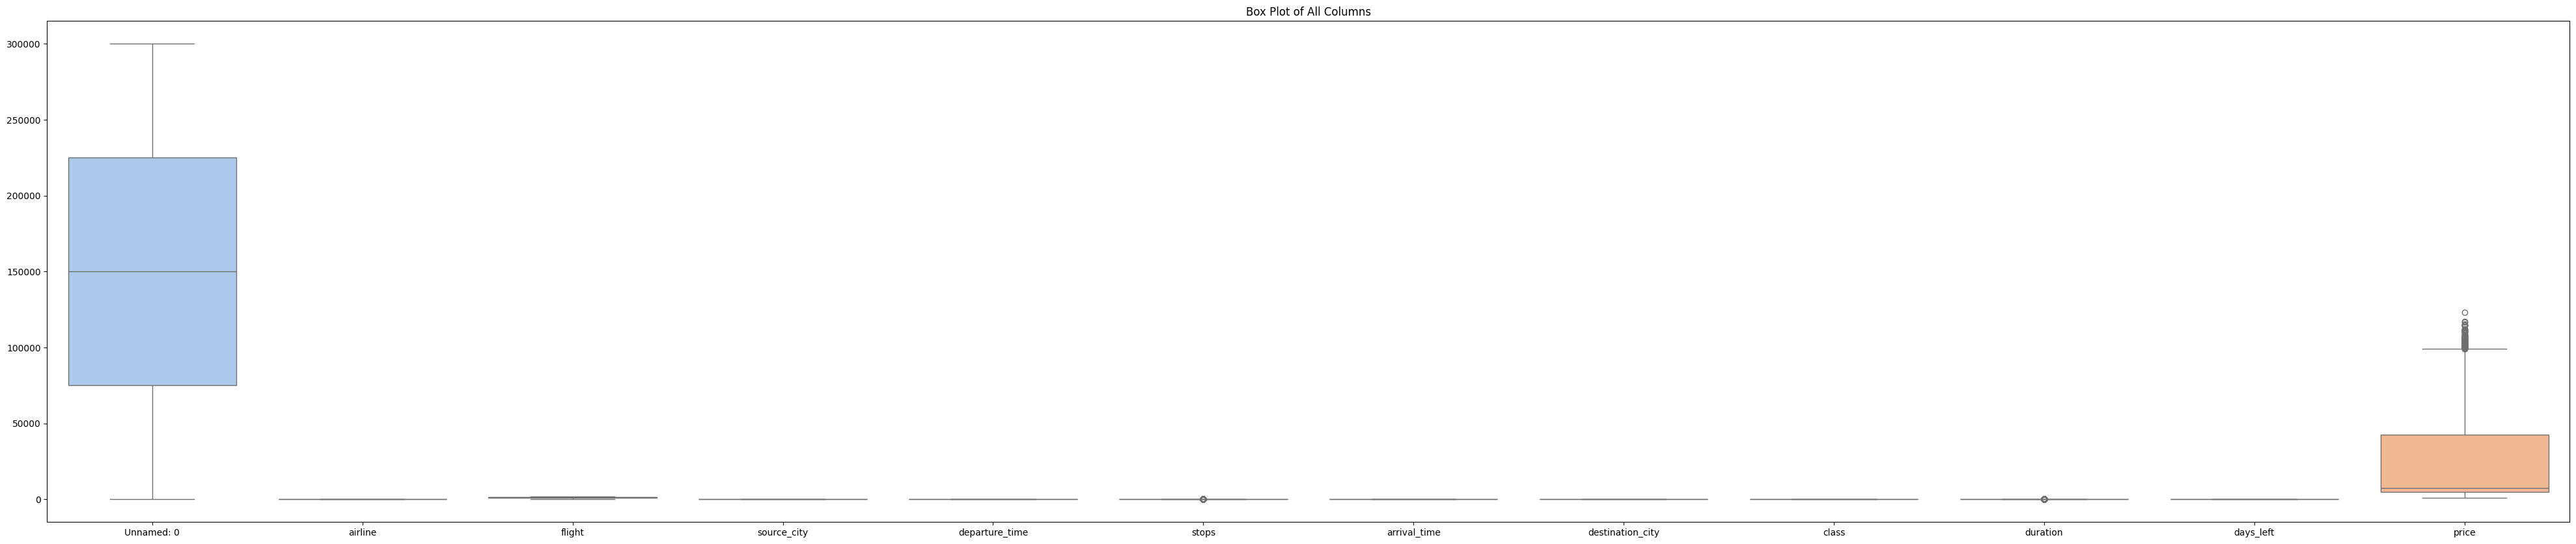

In [ ]:
import seaborn as sns
plt.figure(figsize=(50, 10))
sns.boxplot(data=price, palette='pastel')
plt.title('Box Plot of All Columns')
plt.show()

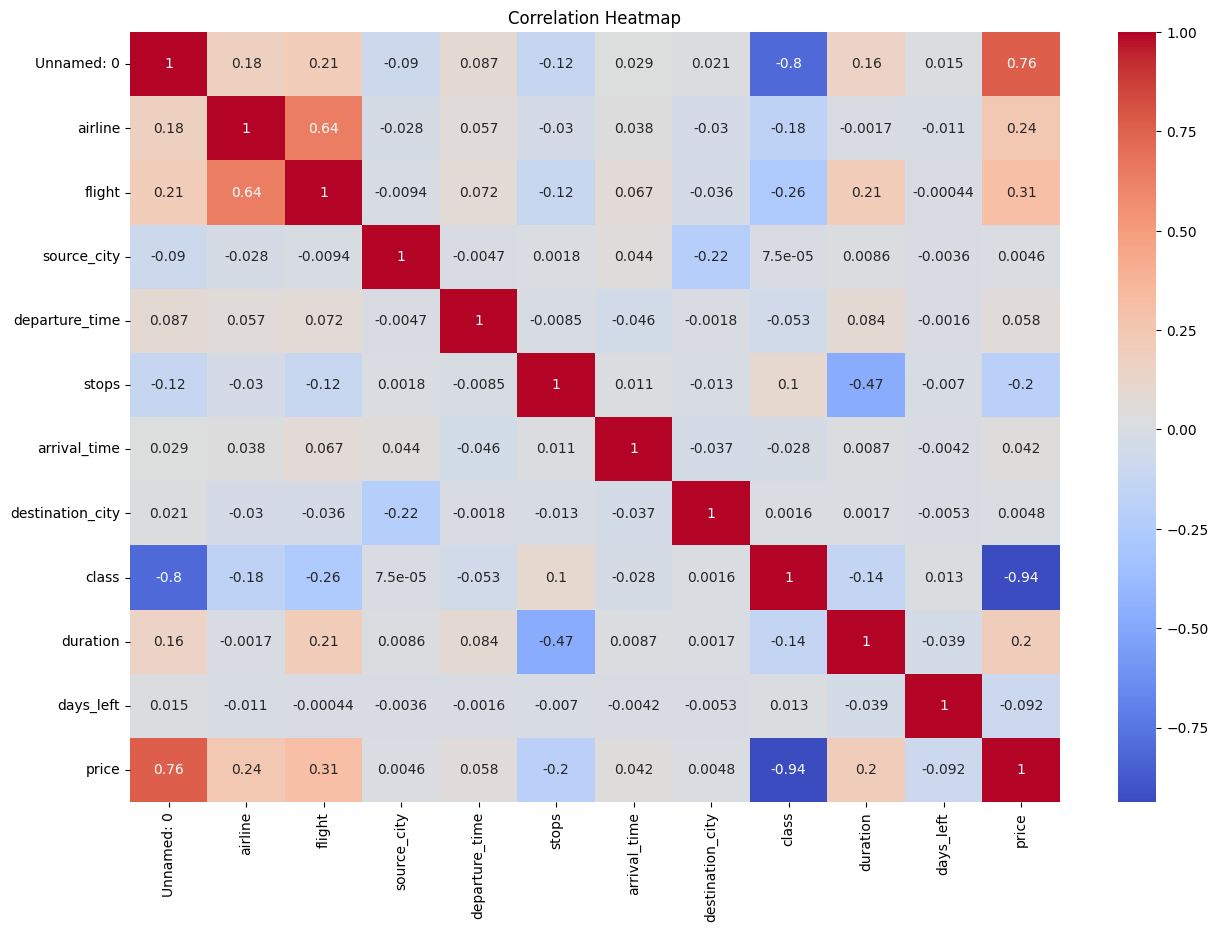

In [ ]:
plt.figure(figsize=(15, 10))  # Reduce figure size
sns.heatmap(price.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Step 2: Data Preprocessing**

In [ ]:
X_reg = price.drop(columns=["price"])  # Replace with actual target column
y_reg = price["price"]

# Split into train-test sets
X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Scale features
scaler_reg = StandardScaler()
X_train_scaled_reg = scaler.fit_transform(X_train)
X_test_scaled_reg = scaler.transform(X_test)

# **Step 3: Build a Regression Model from Scratch (Linear Regression)**

In [ ]:
import numpy as np

class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations

    def fit(self, X, y):
        self.m, self.n = X.shape  # Number of samples (m) and number of features (n)
        self.w = np.zeros(self.n)  # Initialize weights to zeros
        self.b = 0  # Initialize bias to zero
        self.X = X  # Training features
        self.y = y  # Training labels

        # Gradient Descent
        for _ in range(self.num_iterations):
            self.update_weights()

    def update_weights(self):
        y_pred = np.dot(self.X, self.w) + self.b  # Predicted values
        dw = (1 / self.m) * np.dot(self.X.T, (y_pred - self.y))  # Gradient for weights
        db = (1 / self.m) * np.sum(y_pred - self.y)  # Gradient for bias

        self.w -= self.learning_rate * dw  # Update weights
        self.b -= self.learning_rate * db  # Update bias

    def predict(self, X):
        return np.dot(X, self.w) + self.b  # Predict the output

# Train Model
lin_reg_scratch = LinearRegressionScratch(learning_rate=0.01, num_iterations=1000)

# Ensure X_train_scaled_reg and y_train are correctly preprocessed and have valid shapes
lin_reg_scratch.fit(X_train_scaled_reg, y_train)

# Predict
y_pred_scratch = lin_reg_scratch.predict(X_test_scaled_reg)

# Optionally, print the predictions to check the output
print(y_pred_scratch)


[ 2998.54933748 52681.32982374  8876.62232884 ...  7402.07320964
  -417.68841795 58617.47103923]


# **Step 4: Train Two Machine Learning Models (Linear Regression & Decision Tree)**

In [ ]:
# from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression
lin_reg = LinearRegressionScratch()
lin_reg.fit(X_train_scaled_reg, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled_reg)

# Train Decision Tree
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train_scaled_reg, y_train)
y_pred_dt = dt_reg.predict(X_test_scaled_reg)

# Evaluate Models
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lin))
print("Decision Tree MSE:", mean_squared_error(y_test, y_pred_dt))

print("Linear Regression R² Score:", r2_score(y_test, y_pred_lin))
print("Decision Tree R² Score:", r2_score(y_test, y_pred_dt))


Linear Regression MSE: 50086206.04945895
Decision Tree MSE: 7271895.660125602
Linear Regression R² Score: 0.9028362203365524
Decision Tree R² Score: 0.9858930247789519


# **Step 5: Hyperparameter Optimization (GridSearchCV)**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter tuning for Decision Tree
param_grid = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 5, 10]}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled_reg, y_train)

print("Best Hyperparameters for Decision Tree:", grid_search.best_params_)


Best Hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}


# **Step 6: Feature Selection (Using Mutual Information)**

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import pandas as pd

# Convert scaled data back to DataFrame with correct feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled_reg, columns=X_train.columns)

# Compute feature importance
feature_importance = mutual_info_regression(X_train_scaled_df, y_train)

# Create a Series with feature names
feature_scores = pd.Series(feature_importance, index=X_train.columns).sort_values(ascending=False)

# Select top features
selected_features = feature_scores.index[:5]  # Selecting top 5 features
print("Selected Features:", selected_features)


Selected Features: Index(['Unnamed: 0', 'flight', 'duration', 'source_city', 'destination_city'], dtype='object')


In [ ]:
# Train final model with selected features
X_train_final = X_train_scaled_reg[:, :5]  # Selecting top 5 features
X_test_final = X_test_scaled_reg[:, :5]

dt_final = DecisionTreeRegressor(max_depth=5, min_samples_split=2, random_state=42)
dt_final.fit(X_train_final, y_train)

# Predict and Evaluate
y_pred_final = dt_final.predict(X_test_final)

print("Final Model MSE:", mean_squared_error(y_test, y_pred_final))
print("Final Model R² Score:", r2_score(y_test, y_pred_final))


Final Model MSE: 45004952.939843684
Final Model R² Score: 0.9126935003443322
